In [57]:
import pandas as pd

In [58]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

Calculating the Lipinski descritors
The Lipinski's rule or Rule-of-five state's as follows:
1. Molecular weight < 500 Dalton
2. Octanol-water partition coefficient (LogP)< 5
3. Hydrogen bond donors < 5
4. Hydrogen bond acceptors < 10

In [59]:
#Calculating the Lipinski descritors
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [60]:
def lipinski(smiles, verbose=False):

    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1,1)
    i = 0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        
        if(i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i+= 1
    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data = baseData, columns = columnNames)
    
    return descriptors


In [61]:
df_lipinski = lipinski(df.canonical_smiles)

Combine the DataFrame

In [62]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [63]:
display(df)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


In [64]:
df_combine = pd. concat([df, df_lipinski], axis=1)
display(df_combine)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0.0,3.0


Convert IC50 to pIC50
This custom function pIC50 will accept a DataFrame as input and will then:
1. Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10^-9
2. Take the molar value and apply -log10
3. Delete the standard_value column and create a new pIC50 column  

In [65]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input["standard_value_norm"]:
        molar = i*(10**-9) # converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x    

In [66]:
df_combine.standard_value.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value, dtype: float64

In [67]:
-np.log10( (10**-9)* 100000000)

1.0

In [68]:
-np.log10((10**-9)* 10000000000)

-1.0

In [69]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis= 1)

    return x   


In [70]:
df_norm = norm_value(df_combine)
display(df_norm)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,10700.0


In [71]:
df_norm.standard_value_norm.describe()

count        133.000000
mean       85967.130075
std       158897.319181
min           50.000000
25%        10100.000000
50%        17500.000000
75%        70000.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [72]:
df_final = pIC50(df_norm)
display(df_final)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [73]:
df_final.pIC50.describe()

count    133.000000
mean       4.718269
std        0.920910
min        3.000000
25%        4.154902
50%        4.756962
75%        4.995679
max        7.301030
Name: pIC50, dtype: float64

In [74]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.970616


In [75]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


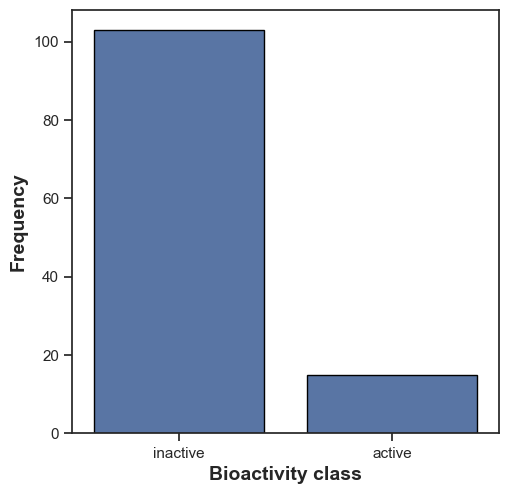

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor= 'black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.png')

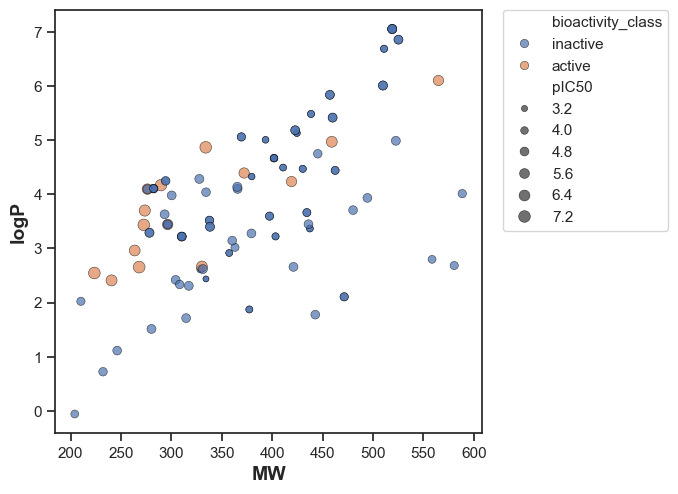

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class',
                 size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('logP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.png')

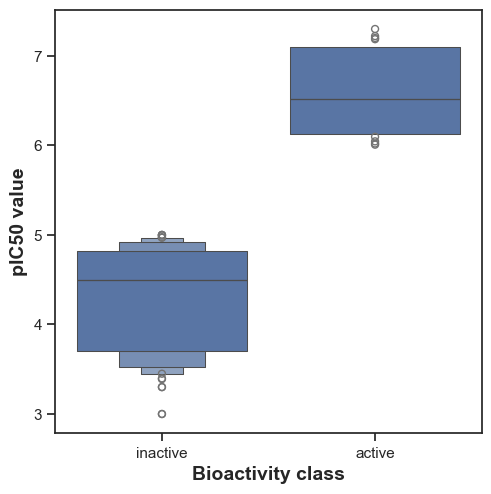

In [80]:
plt.figure(figsize=(5.5, 5.5))

sns.boxenplot(x= 'bioactivity_class', y= 'pIC50', data= df_2class)

plt.xlabel('Bioactivity class', fontsize= 14, fontweight= 'bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight= 'bold')

plt.savefig('plot_iC50.png')

Statistical analysis | Mann-Whitney U Test

In [83]:
def mannwhitney(descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

# seed the random number generator
    seed(1)

# actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    active = df[df.bioactivity_class == 'active']
    active = active[descriptor]        


    selection = [descriptor, 'bioactivity_class']
    df = df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]       

#   compare samples
    stat, p = mannwhitneyu(inactive, active)
    display('Statistics =%.3f, p=%.3f' %(stat, p))  

# interpret
    alpha = 0.5
    if p> alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else: 
        interpretation = 'Different distribution (reject H0)'

    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'P': p,
                            'alpha': alpha,
                            'Interpretation': interpretation}, index=[0])

    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results               

In [84]:
mannwhitney('pIC50')

'Statistics =0.000, p=0.000'

,Descriptor,Statistics,P,alpha,Interpretation
0,pIC50,0.0,4.428384e-10,0.5,Different distribution (reject H0)


MW

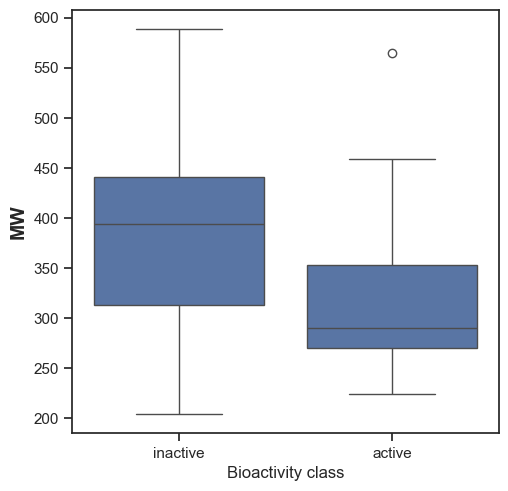

In [85]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x= 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.png')

In [86]:
display(mannwhitney('MW'))

'Statistics =1136.500, p=0.003'

,Descriptor,Statistics,P,alpha,Interpretation
0,MW,1136.5,0.003313,0.5,Different distribution (reject H0)


LogP

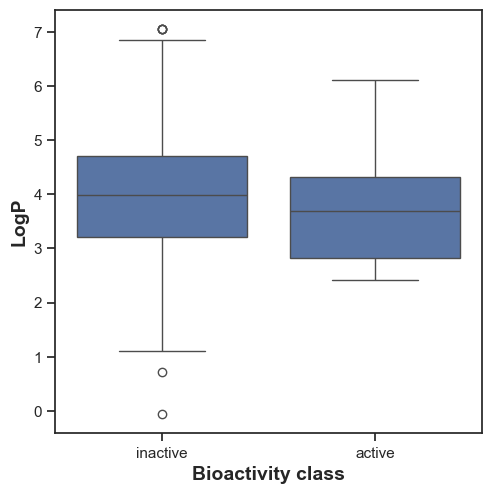

In [87]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x= 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.png')

Statistical analysis | Mann-Whitney U Test

In [88]:
mannwhitney('LogP')

'Statistics =832.500, p=0.631'

,Descriptor,Statistics,P,alpha,Interpretation
0,LogP,832.5,0.630683,0.5,Same distribution (fail to reject H0)


NumHDonors

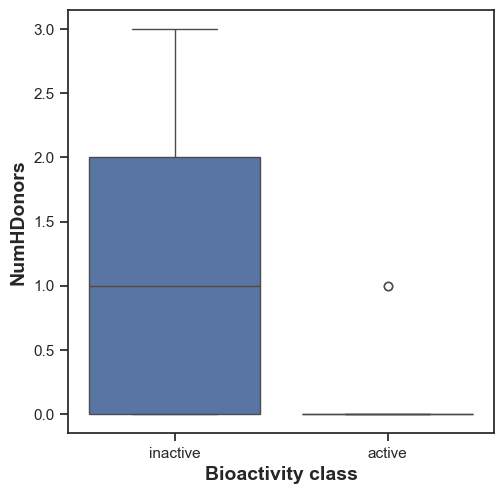

In [92]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y= 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Statistical analysis | Mann-Whitney U Test

In [93]:
mannwhitney('NumHDonors')

'Statistics =1246.500, p=0.000'

,Descriptor,Statistics,P,alpha,Interpretation
0,NumHDonors,1246.5,0.000053,0.5,Different distribution (reject H0)


In [96]:
display(df_2class.columns)

Index(['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')

NumHAcceptor

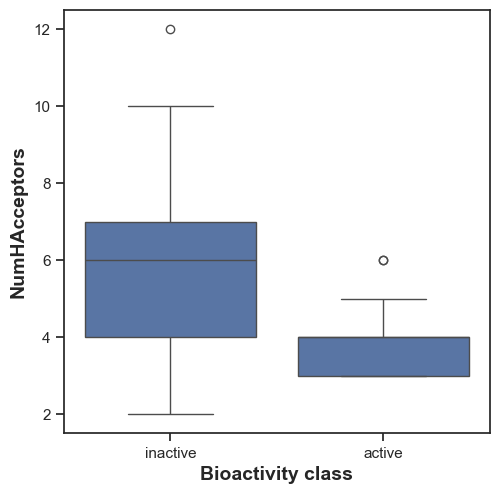

In [97]:
'''plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y= 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptor.png')'''


# Check if 'NumHAcceptor' is in the columns
if 'NumHAcceptors' in df_2class.columns:
    plt.figure(figsize=(5.5, 5.5))
    sns.boxplot(x='bioactivity_class', y='NumHAcceptors', data=df_2class)
    plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
    plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
    plt.savefig('plot_NumHAcceptor.png')
else:
    print("'NumHAcceptors' column not found in DataFrame.")

Statistical analysis | Mann-Whitney U Test

In [98]:
mannwhitney('NumHAcceptors')

'Statistics =1131.000, p=0.003'

,Descriptor,Statistics,P,alpha,Interpretation
0,NumHAcceptors,1131.0,0.003402,0.5,Different distribution (reject H0)


The statistical results were interpreted using Box Plots and pIC50 values. The actives and inactives showed a significant difference in their pIC50 values, as expected since the IC50 threshold values were used to define them. The IC50 threshold values are as follows: IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives. These values correspond to pIC50 > 6 for actives and pIC50 < 5 for inactives.

Out of the four Lipinski's descriptors (MW, LogP, NumHDonors, and NumHAcceptors), only LogP showed no difference between the actives and inactives. The other three descriptors (MW, NumHDonors, and NumHAcceptors) displayed a statistically significant difference between actives and inactives.

In [3]:
import zipfile
import glob
import os

# Directory containing the files to be included in the ZIP file
directory = '.'  # Use '.' for the current directory

# File extensions to include in the ZIP file
extensions = ['csv', 'png', 'pdf']

# Name of the ZIP file
zip_filename = 'results.zip'

# Create a new ZIP file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Iterate over files matching the specified extensions
    for ext in extensions:
        # Using the glob method to find files with the specified extension
        files = glob.glob(os.path.join(directory, f'*.{ext}'))
        # Add each file to the ZIP file
        for file in files:
            zipf.write(file, os.path.basename(file))

print(f'ZIP file "{zip_filename}" created successfully.')

ZIP file "results.zip" created successfully.
